# Analyze differences for factor levels
This notebook can be used to analyze the differences in factor levels changes after lev and dsg

In [1]:
# imports here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# number of permutations
n_perms = 1e7
str_num = "{:.1e}".format(n_perms)

# date
date_string = '2023-12-20'

# Get Middeldorp data

In [3]:
# Here are the values from Middeldorp et al. 2000 Table 1
df_Midd = pd.DataFrame(columns = ['factors','mean inc lev', 'sd inc lev', 'mean inc dsg', 'sd inc dsg'])
df_Midd['factors'] = ['VII', 'V', 'VIII', 'X', 'II']
df_Midd['mean inc lev'] = [12, -3, 6, 22, 12]
df_Midd['sd inc lev'] = [15,12,25,14,8]
df_Midd['mean inc dsg'] = [32,-11,10,25,16]
df_Midd['sd inc dsg'] = [10,8,23,12,6]
df_Midd.set_index('factors', inplace = True)

print(df_Midd)

         mean inc lev  sd inc lev  mean inc dsg  sd inc dsg
factors                                                    
VII                12          15            32          10
V                  -3          12           -11           8
VIII                6          25            10          23
X                  22          14            25          12
II                 12           8            16           6


# Factor VII

In [4]:
factor = 'VII'
fname = date_string + 'Factor' + factor + '_diffs_nperms-'+ str_num + '.csv'
datVII = pd.read_csv(fname)

In [5]:
datVII.head()

,mean diff lev,std diff lev,range diff lev,mean diff dsg,std diff dsg,range diff dsg
0,11.338376,20.042579,75.152749,31.319686,22.457008,96.951220
1,11.338376,27.249753,116.211813,31.319686,28.454273,125.121951
2,11.338376,27.838056,108.513238,31.319686,28.844052,115.243902
3,11.338376,27.903670,131.242363,31.319686,28.072537,133.170732
4,11.338376,24.810975,111.812627,31.319686,26.308294,112.682927


In [6]:
# Mean differences
print('Middeldorp mean: ', df_Midd.loc[factor, 'mean inc lev'])
print(np.mean(datVII['mean diff lev']))
print(np.max(datVII['mean diff lev']))
print(np.min(datVII['mean diff lev']))

print('Middeldorp mean: ', df_Midd.loc[factor, 'mean inc dsg'])
print(np.mean(datVII['mean diff dsg']))
print(np.max(datVII['mean diff dsg']))
print(np.min(datVII['mean diff dsg']))

Middeldorp mean:  12
11.338376492050937
11.338376491125986
11.338376491125974
Middeldorp mean:  32
31.319686412712986
31.319686411149853
31.319686411149828


In [7]:
# Std differences
print('Middeldorp std: ', df_Midd.loc[factor, 'sd inc lev'])
print(np.mean(datVII['std diff lev']))
print(np.max(datVII['std diff lev']))
print(np.min(datVII['std diff lev']))

print('Middeldorp std: ', df_Midd.loc[factor, 'sd inc dsg'])
print(np.mean(datVII['std diff dsg']))
print(np.max(datVII['std diff dsg']))
print(np.min(datVII['std diff dsg']))

Middeldorp std:  15
25.18230472633096
33.77770292680366
11.400375171578936
Middeldorp std:  10
25.81933798358006
34.61957497573014
10.579678900918577


15


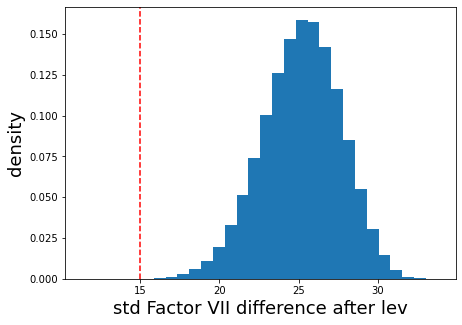

<Figure size 432x288 with 0 Axes>

In [8]:
# std differences lev
plt.figure(figsize=(7,5))
plt.hist(datVII['std diff lev'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['VII', 'sd inc lev'], color='r', linestyle='--')
plt.xlabel('std Factor VII difference after lev', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['VII', 'sd inc lev'])
plt.show()

plt.clf()

In [9]:
# How many are within 10% of the reported SD?
Midd_sd = df_Midd.loc['VII', 'sd inc lev']
print('Middeldorp std: ', Midd_sd)
Midd_sd_max = 1.1 * Midd_sd
Midd_sd_min = 0.9 * Midd_sd

arr = datVII['std diff lev']
low = Midd_sd_min
high = Midd_sd_max
mask = (arr > low) & (arr < high)
count = np.count_nonzero(mask)

print("There are ", count, " permutations within 10 percent of the standard deviation")
print(np.where(mask))

Middeldorp std:  15
There are  4670  permutations within 10 percent of the standard deviation
(array([   2246,    9203,   10220, ..., 9998931, 9999414, 9999469]),)


10


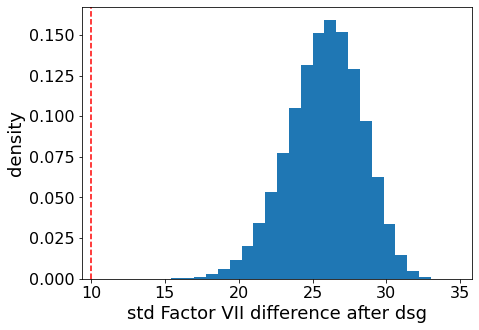

<Figure size 432x288 with 0 Axes>

In [10]:
# std differences dsg
plt.figure(figsize=(7,5))
plt.hist(datVII['std diff dsg'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['VII', 'sd inc dsg'], color='r', linestyle='--')
plt.xlabel('std Factor VII difference after dsg', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['VII', 'sd inc dsg'])
plt.show()
plt.clf()

In [11]:
# How many are within 10% of the reported SD?
Midd_sd = df_Midd.loc['VII', 'sd inc dsg']
print('Middeldorp std: ', Midd_sd)
Midd_sd_max = 1.1 * Midd_sd
Midd_sd_min = 0.9 * Midd_sd

arr = datVII['std diff dsg']
low = Midd_sd_min
high = Midd_sd_max
mask = (arr > low) & (arr < high)
count = np.count_nonzero(mask)

print("There are ", count, " permutations within 10 percent of the standard deviation")
print(np.where(mask))

Middeldorp std:  10
There are  1  permutations within 10 percent of the standard deviation
(array([9531647]),)


In [12]:
# Is it possible to get this std?
# Import factor VII data
# load data
fname = 'data/Factor' + 'VII' + '_all.csv'
dat_MiddVII = pd.read_csv(fname)

dat_noOC2 = np.sort(dat_MiddVII['noOC2'].to_numpy()) # no OC2 data
dat_dsg = np.sort(dat_MiddVII['dsg'].to_numpy()) # dsg data

dsg_diff = dat_dsg - dat_noOC2
print(np.std(dsg_diff))
print(np.mean(dsg_diff))

print('ordered std is ', np.std(dsg_diff))

5.583091983032792
31.319686411149842
ordered std is  5.583091983032792


# Factor V

In [13]:
# factor
factor = 'V'
fname = date_string + 'Factor' + factor + '_diffs_nperms-'+ str_num + '.csv'
datV = pd.read_csv(fname)

In [14]:
datV.head()

,mean diff lev,std diff lev,range diff lev,mean diff dsg,std diff dsg,range diff dsg
0,-3.5363,20.166192,85.901639,-11.651786,17.550719,84.3750
1,-3.5363,24.350488,104.590164,-11.651786,22.031623,112.5000
2,-3.5363,25.975993,110.163934,-11.651786,23.395477,111.5625
3,-3.5363,24.586785,114.426230,-11.651786,21.212193,99.0625
4,-3.5363,22.091361,98.360656,-11.651786,19.204836,81.2500


In [15]:
# Mean differences
print('Middeldorp mean: ', df_Midd.loc['V', 'mean inc lev'])
print(np.mean(datV['mean diff lev']))
print(np.max(datV['mean diff lev']))
print(np.min(datV['mean diff lev']))

print('Middeldorp mean: ', df_Midd.loc['V', 'mean inc dsg'])
print(np.mean(datV['mean diff dsg']))
print(np.max(datV['mean diff dsg']))
print(np.min(datV['mean diff dsg']))

Middeldorp mean:  -3
-3.536299765289516
-3.5362997658079656
-3.53629976580797
Middeldorp mean:  -11
-11.651785715597082
-11.65178571428571
-11.651785714285714


In [16]:
# Std differences
print('Middeldorp std: ', df_Midd.loc['V', 'sd inc lev'])
print(np.mean(datV['std diff lev']))
print(np.max(datV['std diff lev']))
print(np.min(datV['std diff lev']))

print('Middeldorp std: ', df_Midd.loc['V', 'sd inc dsg'])
print(np.mean(datV['std diff dsg']))
print(np.max(datV['std diff dsg']))
print(np.min(datV['std diff dsg']))

Middeldorp std:  12
22.646896488141184
30.604204345633025
10.43543005849204
Middeldorp std:  8
20.036531596026723
26.715663609184062
9.225314378526784


12


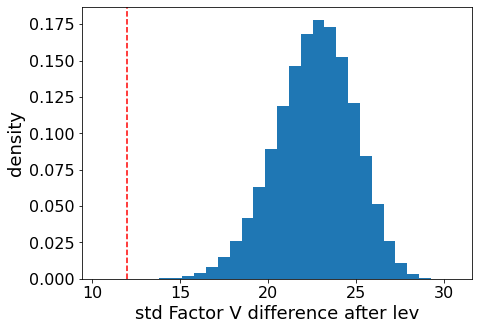

<Figure size 432x288 with 0 Axes>

In [17]:
# std differences lev
plt.figure(figsize=(7,5))
plt.hist(datV['std diff lev'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['V', 'sd inc lev'], color='r', linestyle='--')
plt.xlabel('std Factor V difference after lev', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['V', 'sd inc lev'])
plt.show()

plt.clf()

In [18]:
Midd_sd = df_Midd.loc['V', 'sd inc lev']
print('Middeldorp std: ', Midd_sd)
Midd_sd_max = 1.1 * Midd_sd
Midd_sd_min = 0.9 * Midd_sd

# How many are within 10% of the reported SD?
arr = datV['std diff lev']
low = Midd_sd_min
high = Midd_sd_max
mask = (arr > low) & (arr < high)
count = np.count_nonzero(mask)

print("There are ", count, " permutations within 10 percent of the standard deviation")
#print(np.where(mask))


Middeldorp std:  12
There are  521  permutations within 10 percent of the standard deviation


In [19]:
count/1e7 * 100

0.00521

8


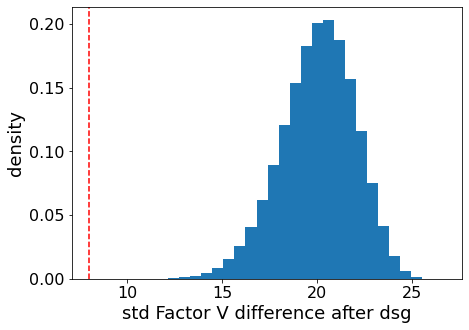

<Figure size 432x288 with 0 Axes>

In [20]:
# std differences dsg
plt.figure(figsize=(7,5))
plt.hist(datV['std diff dsg'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['V', 'sd inc dsg'], color='r', linestyle='--')
plt.xlabel('std Factor V difference after dsg', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['V', 'sd inc dsg'])
plt.show()
plt.clf()

In [21]:
Midd_sd = df_Midd.loc['V', 'sd inc dsg']
print('Middeldorp std: ', Midd_sd)
Midd_sd_max = 1.1 * Midd_sd
Midd_sd_min = 0.9 * Midd_sd

# How many are within 10% of the reported SD?
arr = datV['std diff dsg']
low = Midd_sd_min
high = Midd_sd_max
mask = (arr > low) & (arr < high)
count = np.count_nonzero(mask)

print("There are ", count, " permutations within 10 percent of the standard deviation")
#print(np.where(mask))

Middeldorp std:  8
There are  0  permutations within 10 percent of the standard deviation


In [22]:
# Fully sorted case
# Is it possible to get this std?
# Import factor V data
# load data
fname = 'data/Factor' + 'V' + '_all.csv'
dat_MiddV = pd.read_csv(fname)

dat_noOC2 = np.sort(dat_MiddV['noOC2'].to_numpy()) # no OC2 data
dat_dsg = np.sort(dat_MiddV['dsg'].to_numpy()) # dsg data

dsg_diff = dat_dsg - dat_noOC2
print(np.std(dsg_diff))
print(np.mean(dsg_diff))

print('ordered std is ', np.std(dsg_diff))

5.45620828641978
-11.651785714285714
ordered std is  5.45620828641978


# Factor VIII
NOTE: Factor VIII did not have a full 28 patients in the data so I will do separately.

# Factor X

In [23]:
factor = 'X'
fname = date_string + 'Factor' + factor + '_diffs_nperms-'+ str_num + '.csv'
datX = pd.read_csv(fname)

In [24]:
datX.head()

,mean diff lev,std diff lev,range diff lev,mean diff dsg,std diff dsg,range diff dsg
0,22.122777,18.376097,78.393574,25.253456,16.132865,66.752688
1,22.122777,23.062576,99.598394,25.253456,20.486505,90.494624
2,22.122777,23.355639,85.140562,25.253456,21.581891,90.150538
3,22.122777,22.951371,116.305221,25.253456,20.504248,97.720430
4,22.122777,22.398094,108.273092,25.253456,19.237266,88.774194


In [25]:
# Mean differences
print('Middeldorp mean: ', df_Midd.loc['X', 'mean inc lev'])
print(np.mean(datX['mean diff lev']))
print(np.max(datX['mean diff lev']))
print(np.min(datX['mean diff lev']))

print('Middeldorp mean: ', df_Midd.loc['X', 'mean inc dsg'])
print(np.mean(datX['mean diff dsg']))
print(np.max(datX['mean diff dsg']))
print(np.min(datX['mean diff dsg']))

Middeldorp mean:  22
22.122776827123456
22.12277682157201
22.122776821571996
Middeldorp mean:  25
25.25345622711085
25.25345622119817
25.253456221198157


In [26]:
# Std differences
print('Middeldorp std: ', df_Midd.loc['X', 'sd inc lev'])
print(np.mean(datX['std diff lev']))
print(np.max(datX['std diff lev']))
print(np.min(datX['std diff lev']))

print('Middeldorp std: ', df_Midd.loc['X', 'sd inc dsg'])
print(np.mean(datX['std diff dsg']))
print(np.max(datX['std diff dsg']))
print(np.min(datX['std diff dsg']))

Middeldorp std:  14
21.000309853593368
28.3500119739258
8.812870516769332
Middeldorp std:  12
19.10407323272663
25.932691013075612
8.618032299829494


14


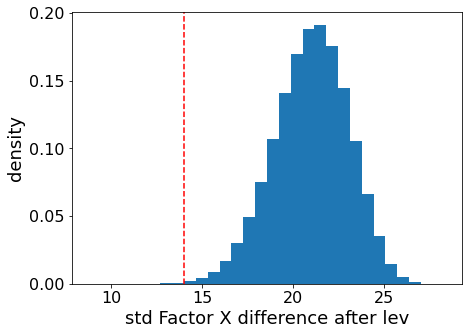

<Figure size 432x288 with 0 Axes>

In [27]:
# std differences lev
plt.figure(figsize=(7,5))
plt.hist(datX['std diff lev'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['X', 'sd inc lev'], color='r', linestyle='--')
plt.xlabel('std Factor X difference after lev', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['X', 'sd inc lev'])
plt.show()

plt.clf()

In [28]:
Midd_sd = df_Midd.loc['X', 'sd inc lev']
print('Middeldorp std: ', Midd_sd)
Midd_sd_max = 1.1 * Midd_sd
Midd_sd_min = 0.9 * Midd_sd

# How many are within 10% of the reported SD?
arr = datX['std diff lev']
low = Midd_sd_min
high = Midd_sd_max
mask = (arr > low) & (arr < high)
count = np.count_nonzero(mask)

print("There are ", count, " permutations within 10 percent of the standard deviation")
#print(np.where(mask))

Middeldorp std:  14
There are  53735  permutations within 10 percent of the standard deviation


12


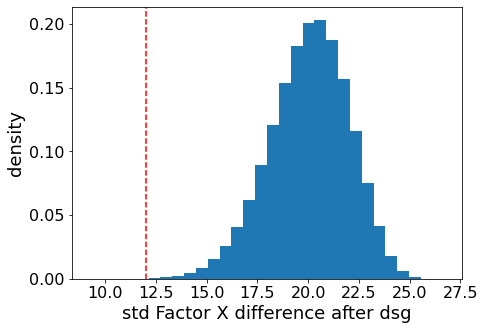

<Figure size 432x288 with 0 Axes>

In [29]:
# std differences dsg
plt.figure(figsize=(7,5))
plt.hist(datV['std diff dsg'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['X', 'sd inc dsg'], color='r', linestyle='--')
plt.xlabel('std Factor X difference after dsg', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['X', 'sd inc dsg'])
plt.show()
plt.clf()

In [30]:
Midd_sd = df_Midd.loc['X', 'sd inc dsg']
print('Middeldorp std: ', Midd_sd)
Midd_sd_max = 1.1 * Midd_sd
Midd_sd_min = 0.9 * Midd_sd

# How many are within 10% of the reported SD?
arr = datV['std diff dsg']
low = Midd_sd_min
high = Midd_sd_max
mask = (arr > low) & (arr < high)
count = np.count_nonzero(mask)

print("There are ", count, " permutations within 10 percent of the standard deviation")
#print(np.where(mask))

Middeldorp std:  12
There are  9542  permutations within 10 percent of the standard deviation


# Factor II

In [31]:
# factor
factor = 'II'
fname = date_string + 'Factor' + factor + '_diffs_nperms-'+ str_num + '.csv'
datII = pd.read_csv(fname)

In [32]:
datII.head()

,mean diff lev,std diff lev,range diff lev,mean diff dsg,std diff dsg,range diff dsg
0,12.594517,16.192175,72.404040,15.323703,15.855036,88.689139
1,12.594517,19.687529,82.101010,15.323703,20.299284,106.067416
2,12.594517,20.576452,92.444444,15.323703,19.807473,106.067416
3,12.594517,20.436523,107.959596,15.323703,19.303800,99.176030
4,12.594517,17.006813,71.111111,15.323703,16.753729,88.689139


In [33]:
# Mean differences
print('Middeldorp mean: ', df_Midd.loc['II', 'mean inc lev'])
print(np.mean(datII['mean diff lev']))
print(np.max(datII['mean diff lev']))
print(np.min(datII['mean diff lev']))

print('Middeldorp mean: ', df_Midd.loc['II', 'mean inc dsg'])
print(np.mean(datII['mean diff dsg']))
print(np.max(datII['mean diff dsg']))
print(np.min(datII['mean diff dsg']))

Middeldorp mean:  12
12.594516593262535
12.594516594516604
12.594516594516596
Middeldorp mean:  16
15.323702514210478
15.323702514713757
15.323702514713744


In [34]:
# Std differences
print('Middeldorp std: ', df_Midd.loc['II', 'sd inc lev'])
print(np.mean(datII['std diff lev']))
print(np.max(datII['std diff lev']))
print(np.min(datII['std diff lev']))

print('Middeldorp std: ', df_Midd.loc['II', 'sd inc dsg'])
print(np.mean(datII['std diff dsg']))
print(np.max(datII['std diff dsg']))
print(np.min(datII['std diff dsg']))

Middeldorp std:  8
18.12955835984021
23.994030131775794
7.3441963527053264
Middeldorp std:  6
17.869000940796305
22.676679217366257
5.9213074862463255


In [35]:
Midd_sd = df_Midd.loc['II', 'sd inc lev']
print('Middeldorp std: ', Midd_sd)
Midd_sd_max = 1.1 * Midd_sd
Midd_sd_min = 0.9 * Midd_sd

Middeldorp std:  8


8


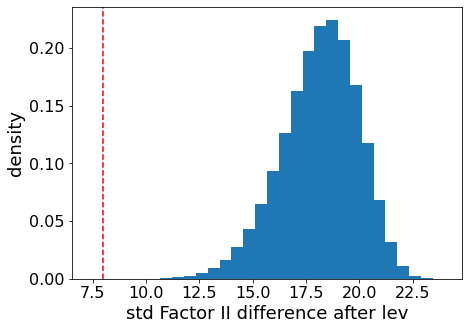

<Figure size 432x288 with 0 Axes>

In [36]:
# std differences lev
plt.figure(figsize=(7,5))
plt.hist(datII['std diff lev'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['II', 'sd inc lev'], color='r', linestyle='--')
plt.xlabel('std Factor II difference after lev', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['II', 'sd inc lev'])
plt.show()

plt.clf()

In [37]:
# How many are within 10% of the reported SD?
arr = datII['std diff lev']
low = Midd_sd_min
high = Midd_sd_max
mask = (arr > low) & (arr < high)
count = np.count_nonzero(mask)

print("There are ", count, " permutations within 10 percent of the standard deviation")
print(np.where(mask))

There are  38  permutations within 10 percent of the standard deviation
(array([  74122,  699967,  743445,  846346, 1499186, 2378924, 2669753,
       2957468, 3423018, 3521627, 3869445, 4509623, 4699349, 4714601,
       4873599, 4919662, 4962853, 5045788, 5098949, 5394734, 5819539,
       6047215, 6745881, 7395049, 7665480, 7800442, 7849644, 8037435,
       8113643, 8306541, 8379985, 8510392, 8879356, 9315813, 9426477,
       9531647, 9775636, 9962639]),)


6


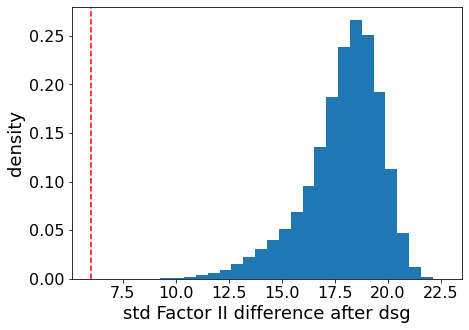

<Figure size 432x288 with 0 Axes>

In [38]:
# std differences dsg
plt.figure(figsize=(7,5))
plt.hist(datII['std diff dsg'], density = True, bins = 30)
plt.axvline(x=df_Midd.loc['II', 'sd inc dsg'], color='r', linestyle='--')
plt.xlabel('std Factor II difference after dsg', fontsize=18)
plt.ylabel('density', fontsize = 18)
plt.rcParams.update({'font.size': 16})
print(df_Midd.loc['II', 'sd inc dsg'])
plt.show()
plt.clf()

In [39]:
# Is it possible to get this std?
# Import factor II data
# load data
fname = 'data/Factor' + factor + '_all.csv'
dat_MiddII = pd.read_csv(fname)

In [40]:
dat_noOC1 = np.sort(dat_MiddII['noOC1'].to_numpy()) # no OC1 data
dat_lev = np.sort(dat_MiddII['lev'].to_numpy()) # lev data
dat_noOC2 = np.sort(dat_MiddII['noOC2'].to_numpy()) # no OC2 data
dat_dsg = np.sort(dat_MiddII['dsg'].to_numpy()) # dsg data

In [41]:
lev_diff = dat_lev - dat_noOC1
print(np.std(lev_diff))
print(np.mean(lev_diff))

dsg_diff = dat_dsg - dat_noOC2
print(np.std(dsg_diff))
print(np.mean(dsg_diff))

2.8025807451015234
12.5945165945166
3.221809127523439
15.323702514713753
